### Importing all Dependencies

In [1]:
import numpy as np
from numpy import mean, std
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "darkgrid")
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn import preprocessing
print ('ready')

ready


### Reading in Dataset with Pandas

In [2]:
df = pd.read_csv("Dataset_Brine_Injection_Ketzin_final--dynamic phase.csv")

### Exploratory Data Analysis :Using Pandas Profiling

In [3]:
import pandas_profiling as pp

In [4]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

## Manual Exploratory Data Analysis

In [5]:
df.info()
#The dataset majorly has datatypes that are not integers, this will be changed during data cleaning.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24567 entries, 0 to 24566
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date [dd.mm.yyyy]         24567 non-null  object 
 1   Time [hh:mm:ss]           24567 non-null  object 
 2   Unnamed: 2                24567 non-null  object 
 3   Date / Time               24567 non-null  object 
 4   Flow [kg/h]               24567 non-null  object 
 5   cum. mass [t]             24567 non-null  object 
 6   Density [kg/dm³]          24567 non-null  float64
 7   Temperature [°C]          24567 non-null  float64
 8   el. conductivity [mS/cm]  24567 non-null  object 
 9   BHP 201 [bar] at 550 m    24034 non-null  float64
 10  BHP 201 [bar] at 630 m    24034 non-null  float64
dtypes: float64(4), object(7)
memory usage: 2.1+ MB


In [6]:
df.describe()
#View of the statistical spread of raw data.

,Density [kg/dm³],Temperature [°C],BHP 201 [bar] at 550 m,BHP 201 [bar] at 630 m
count,24567.000000,24567.000000,24034.000000,24034.000000
mean,1.171734,10.466715,64.908876,74.105692
std,0.049776,3.441301,5.043243,5.075002
min,0.000000,-7.720000,57.400000,58.810000
25%,1.170000,8.805000,59.050000,68.220000
50%,1.172600,11.040000,66.710000,75.900000
75%,1.180000,12.710000,69.400000,78.660000
max,1.180000,86.330000,71.910000,81.150000


In [7]:
df.shape
#View of the shape of the dataframe, dataframe ahs 24,567 rows and 11 columns

(24567, 11)

In [8]:
df.columns
#View of the name of the column in pandas

Index(['Date [dd.mm.yyyy]', 'Time [hh:mm:ss]', 'Unnamed: 2', 'Date / Time',
       'Flow [kg/h]', 'cum. mass [t]', 'Density [kg/dm³]', 'Temperature [°C]',
       'el. conductivity [mS/cm]', 'BHP 201 [bar] at 550 m',
       'BHP 201 [bar] at 630 m'],
      dtype='object')

In [9]:
df.head()
#View of the first 5 rows of the data

,Date [dd.mm.yyyy],Time [hh:mm:ss],Unnamed: 2,Date / Time,Flow [kg/h],cum. mass [t],Density [kg/dm³],Temperature [°C],el. conductivity [mS/cm],BHP 201 [bar] at 550 m,BHP 201 [bar] at 630 m
0,10/12/2015,16:45:00,0:05:00,12/10/2015 16:45,2.64,4.7,1.0947,12.26,0,62.91,71.50
1,10/12/2015,16:50:00,0:05:00,12/10/2015 16:50,132.17,4.71,0.2810,12.07,0,61.26,63.47
2,10/12/2015,16:55:00,0:05:00,12/10/2015 16:55,597.58,4.77,0.5703,11.83,0,61.82,66.30
3,10/12/2015,17:00:00,0:05:00,12/10/2015 17:00,"1,930.52",4.93,1.1696,12.03,0,61.88,71.06
4,10/12/2015,17:05:00,0:05:00,12/10/2015 17:05,"1,831.07",5.08,1.1703,10.96,0,62.02,71.21


In [10]:
### Checking for Missing data (Nans) in the datafarme using the library missingno
import missingno as msno
msno.bar(df)
%matplotlib inline
# Null values found in the 2 pressure columns

<AxesSubplot:>

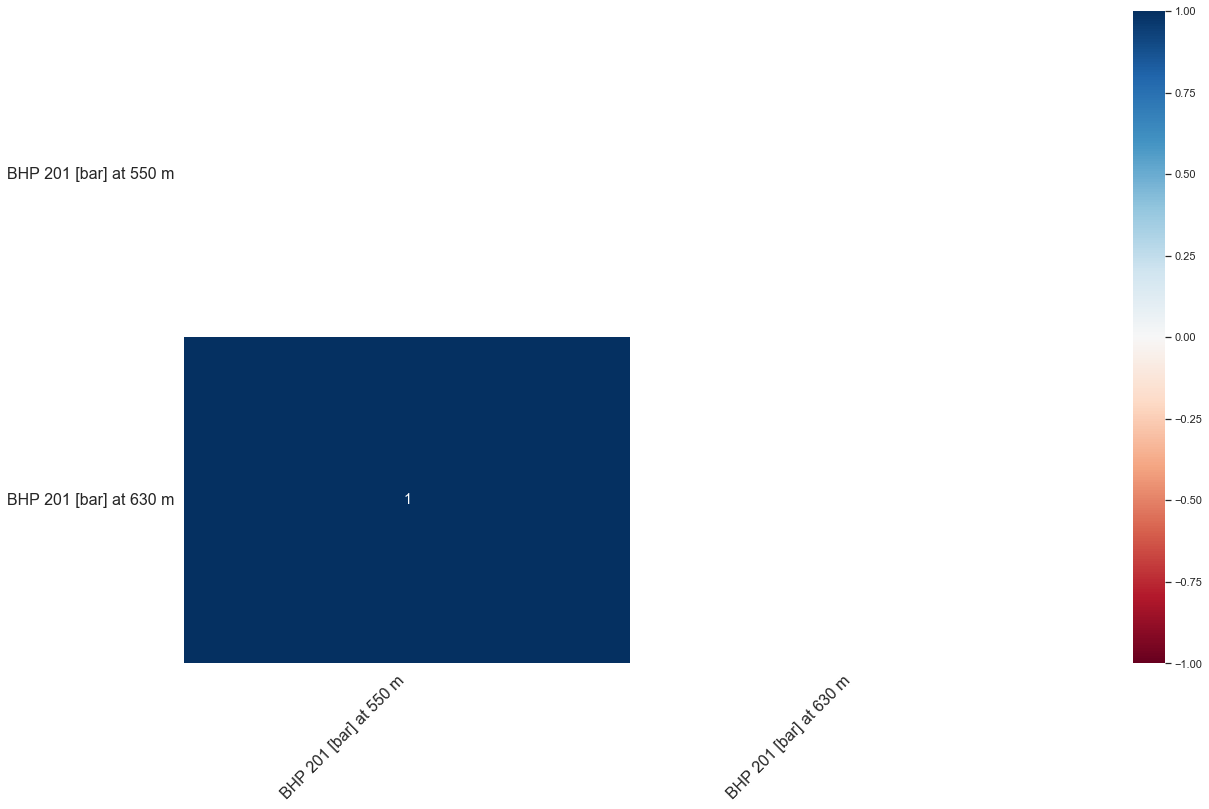

In [11]:
msno.heatmap(df)

<AxesSubplot:>

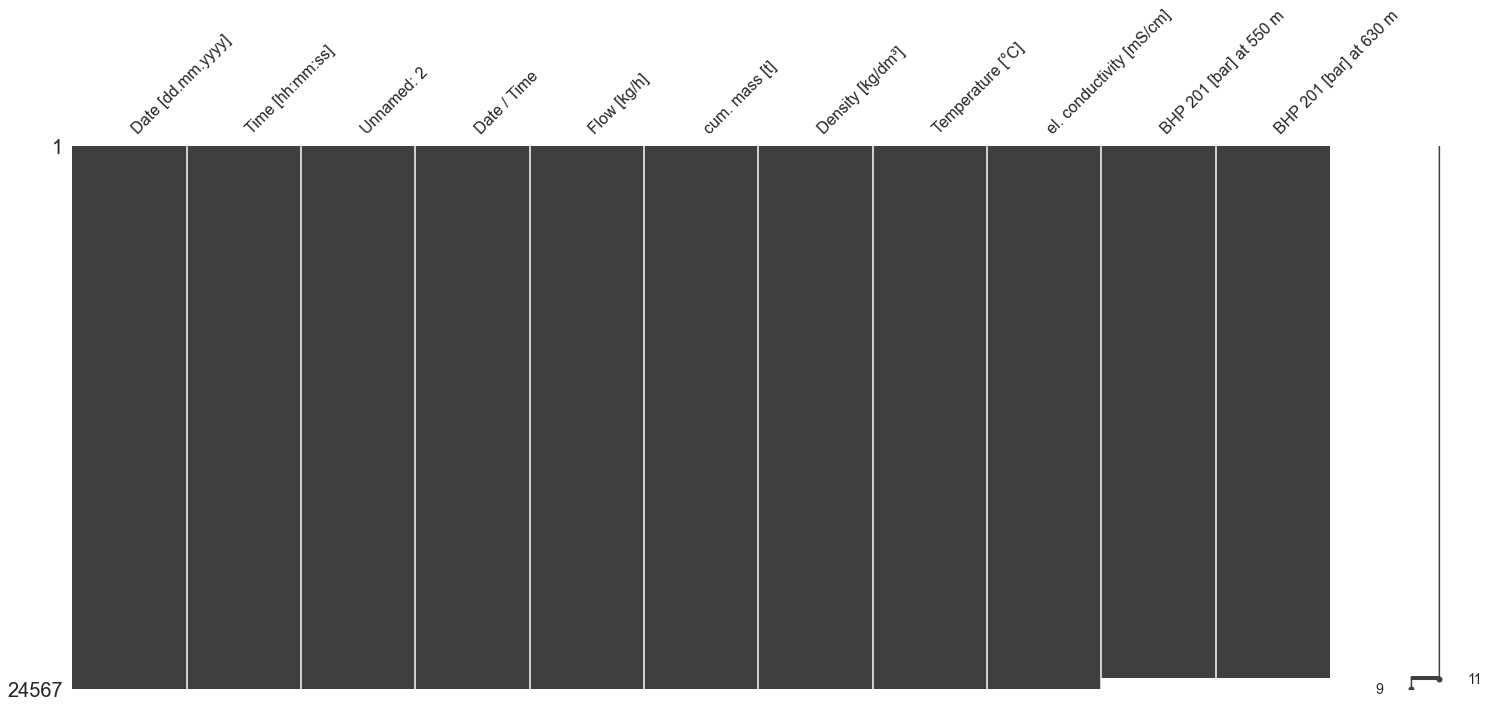

In [12]:
msno.matrix(df)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Cleaning

In [13]:
# Renaming of column name to prevent interference during coding
df.rename(columns={
    'Date / Time':'datetime',
    'Flow [kg/h]':'flow',
    'cum. mass [t]':'mass',
    'Density [kg/dm³]':'density',
    'Temperature [°C]':'temp',
    'el. conductivity [mS/cm]':'conductivity',
    'BHP 201 [bar] at 550 m':'BHP 550m',
    'BHP 201 [bar] at 630 m': 'BHP 630m'}, inplace=True)

In [14]:
df.columns

Index(['Date [dd.mm.yyyy]', 'Time [hh:mm:ss]', 'Unnamed: 2', 'datetime',
       'flow', 'mass', 'density', 'temp', 'conductivity', 'BHP 550m',
       'BHP 630m'],
      dtype='object')

### Converting dataframe to Numeric datatype

In [15]:
#Conversion of datatype to integers
df['flow'] = pd.to_numeric(df['flow'],errors='coerce')
df['mass'] = pd.to_numeric(df['mass'],errors='coerce')
df['density'] = pd.to_numeric(df['density'], errors='coerce')
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['conductivity'] = pd.to_numeric(df['conductivity'], errors='coerce')
df['BHP 550m'] = pd.to_numeric(df['BHP 550m'], errors='coerce')
df['BHP 630m'] = pd.to_numeric(df['BHP 630m'], errors='coerce')

### Cleaning columns with null values

In [16]:
#Cleaning up the columns with null values
df.isnull().sum()

Date [dd.mm.yyyy]        0
Time [hh:mm:ss]          0
Unnamed: 2               0
datetime                 0
flow                 21777
mass                 15253
density                  0
temp                     0
conductivity             1
BHP 550m               533
BHP 630m               533
dtype: int64

In [17]:
df["BHP 550m"].mean()

64.90887575934168

In [18]:
df["BHP 630m"].mean()

74.1056919364253

In [20]:
#Filling the Nans with the mean of each column
df["BHP 550m"].fillna('64.37', inplace=True)
df["BHP 630m"].fillna('73.57', inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24567 entries, 0 to 24566
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date [dd.mm.yyyy]  24567 non-null  object 
 1   Time [hh:mm:ss]    24567 non-null  object 
 2   Unnamed: 2         24567 non-null  object 
 3   datetime           24567 non-null  object 
 4   flow               2790 non-null   float64
 5   mass               9314 non-null   float64
 6   density            24567 non-null  float64
 7   temp               24567 non-null  float64
 8   conductivity       24566 non-null  float64
 9   BHP 550m           24567 non-null  object 
 10  BHP 630m           24567 non-null  object 
dtypes: float64(5), object(6)
memory usage: 2.1+ MB


In [22]:
df.isnull().sum()

Date [dd.mm.yyyy]        0
Time [hh:mm:ss]          0
Unnamed: 2               0
datetime                 0
flow                 21777
mass                 15253
density                  0
temp                     0
conductivity             1
BHP 550m                 0
BHP 630m                 0
dtype: int64

In [23]:
df["flow"].mean()

619.4125197132622

In [24]:
df["mass"].mean()

547.3048255314563

In [25]:
df["conductivity"].mean()

250.1583440527544

In [26]:
#Replacing Nans with mean values
df["flow"].fillna('619.41', inplace=True)
df["mass"].fillna('547.30', inplace=True)
df["conductivity"].fillna('250.16', inplace=True)

### Conversion of dataype to Integers

In [27]:
# convert floats to int 

df['BHP 550m']=df['BHP 550m'].astype(float).astype(int)
df['BHP 630m']=df['BHP 630m'].astype(float).astype(int)
df['flow']=df['flow'].astype(float).astype(int)
df['mass']=df['mass'].astype(float).astype(int)
df['density']=df['density'].astype(float).astype(int)
df['temp']=df['temp'].astype(float).astype(int)
df['conductivity']=df['conductivity'].astype(float).astype(int)
df['conductivity']=df['conductivity'].astype(float).astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24567 entries, 0 to 24566
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date [dd.mm.yyyy]  24567 non-null  object
 1   Time [hh:mm:ss]    24567 non-null  object
 2   Unnamed: 2         24567 non-null  object
 3   datetime           24567 non-null  object
 4   flow               24567 non-null  int32 
 5   mass               24567 non-null  int32 
 6   density            24567 non-null  int32 
 7   temp               24567 non-null  int32 
 8   conductivity       24567 non-null  int32 
 9   BHP 550m           24567 non-null  int32 
 10  BHP 630m           24567 non-null  int32 
dtypes: int32(7), object(4)
memory usage: 1.4+ MB


In [29]:
df.isnull().sum()

Date [dd.mm.yyyy]    0
Time [hh:mm:ss]      0
Unnamed: 2           0
datetime             0
flow                 0
mass                 0
density              0
temp                 0
conductivity         0
BHP 550m             0
BHP 630m             0
dtype: int64

### Scatter Matrix and Correlation of Columns

In [30]:
#Checking for correlaion with Pandas
df.corr()

,flow,mass,density,temp,conductivity,BHP 550m,BHP 630m
flow,1.000000,0.003221,0.239361,0.122809,0.007351,0.134935,0.154726
mass,0.003221,1.000000,-0.002095,0.185929,-0.054340,0.244786,0.237384
density,0.239361,-0.002095,1.000000,0.018726,0.133978,0.031217,0.102962
temp,0.122809,0.185929,0.018726,1.000000,-0.294409,-0.221730,-0.219502
conductivity,0.007351,-0.054340,0.133978,-0.294409,1.000000,0.126258,0.138144
BHP 550m,0.134935,0.244786,0.031217,-0.221730,0.126258,1.000000,0.993791
BHP 630m,0.154726,0.237384,0.102962,-0.219502,0.138144,0.993791,1.000000


In [31]:
#hecking for statistical spread of dataframe
df.describe()

,flow,mass,density,temp,conductivity,BHP 550m,BHP 630m
count,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000
mean,618.996744,546.925469,0.996988,9.996744,249.660357,64.369154,73.551675
std,91.607603,183.486791,0.054802,3.362177,26.306413,5.004391,4.998225
min,0.000000,4.000000,0.000000,-7.000000,0.000000,57.000000,58.000000
25%,619.000000,547.000000,1.000000,8.000000,248.000000,59.000000,68.000000
50%,619.000000,547.000000,1.000000,11.000000,250.000000,66.000000,75.000000
75%,619.000000,547.000000,1.000000,12.000000,254.000000,69.000000,78.000000
max,999.000000,1114.000000,1.000000,86.000000,341.000000,71.000000,81.000000


### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Visualization 

### Visualization of features with Boxplot 

<AxesSubplot:xlabel='temp'>

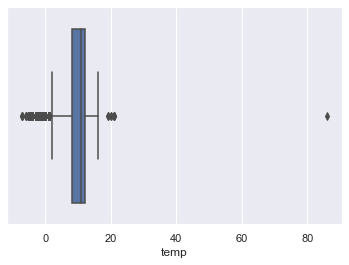

In [32]:
sns.boxplot(df['temp'])

<AxesSubplot:xlabel='mass'>

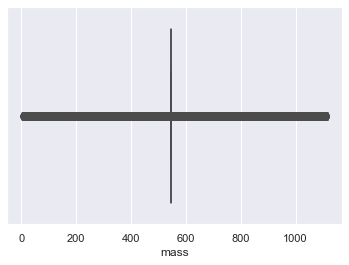

In [33]:
sns.boxplot(df['mass'])

<AxesSubplot:xlabel='flow'>

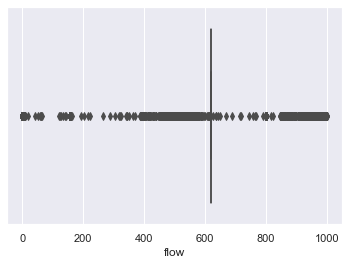

In [34]:
sns.boxplot(df['flow'])

<AxesSubplot:xlabel='temp'>

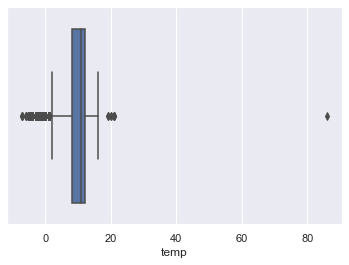

In [35]:
sns.boxplot(df['temp'])

<AxesSubplot:xlabel='conductivity'>

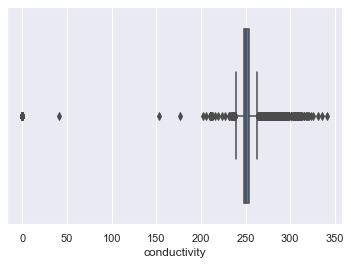

In [36]:
sns.boxplot(df['conductivity'])

<AxesSubplot:xlabel='BHP 550m'>

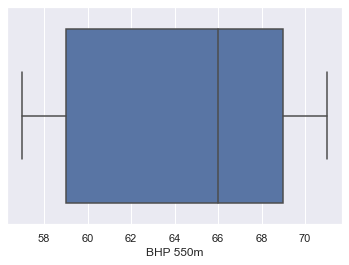

In [37]:
sns.boxplot(df['BHP 550m'])

<AxesSubplot:xlabel='BHP 630m'>

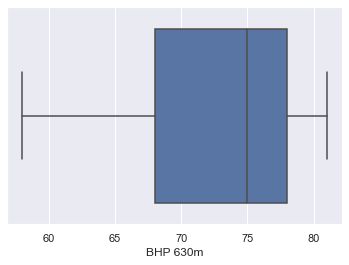

In [38]:
sns.boxplot(df['BHP 630m'])

###  Visualization of features using Violinplot

<AxesSubplot:xlabel='flow'>

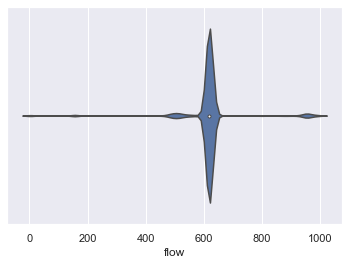

In [39]:
sns.violinplot(df['flow'])

In [40]:
df.columns

Index(['Date [dd.mm.yyyy]', 'Time [hh:mm:ss]', 'Unnamed: 2', 'datetime',
       'flow', 'mass', 'density', 'temp', 'conductivity', 'BHP 550m',
       'BHP 630m'],
      dtype='object')

<AxesSubplot:xlabel='flow'>

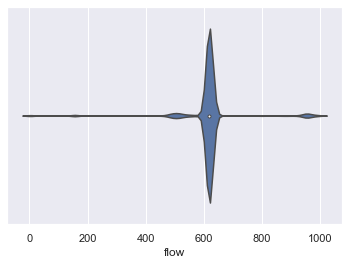

In [42]:
sns.violinplot(df['flow'])

<AxesSubplot:xlabel='mass'>

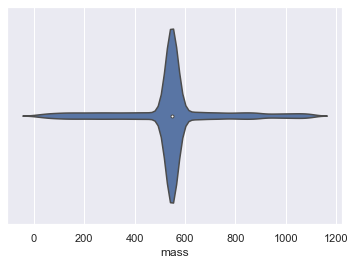

In [41]:
sns.violinplot(df['mass'])

<AxesSubplot:xlabel='density'>

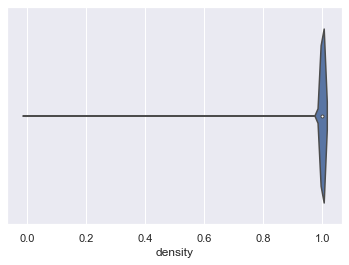

In [43]:
sns.violinplot(df['density'])

<AxesSubplot:xlabel='temp'>

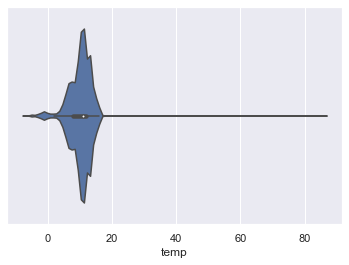

In [44]:
sns.violinplot(df['temp'])

<AxesSubplot:xlabel='conductivity'>

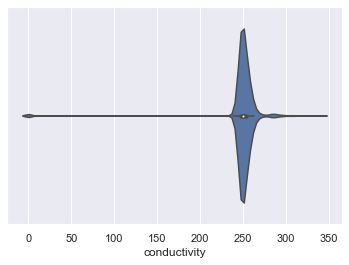

In [45]:
sns.violinplot(df['conductivity'])

<AxesSubplot:xlabel='BHP 550m'>

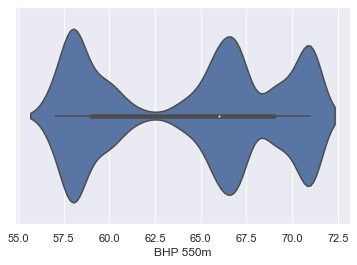

In [46]:
sns.violinplot(df['BHP 550m'])

<AxesSubplot:xlabel='BHP 630m'>

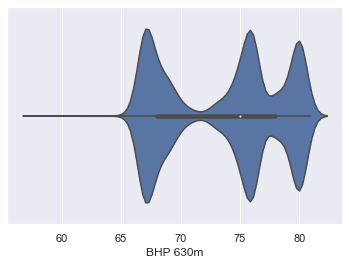

In [47]:
sns.violinplot(df['BHP 630m'])

### --------------------------------------------------------------------------------------------------------------------------------------------------------

### Feature Selection

In [48]:
df.corr()

,flow,mass,density,temp,conductivity,BHP 550m,BHP 630m
flow,1.000000,0.003221,0.239361,0.122809,0.007351,0.134935,0.154726
mass,0.003221,1.000000,-0.002095,0.185929,-0.054340,0.244786,0.237384
density,0.239361,-0.002095,1.000000,0.018726,0.133978,0.031217,0.102962
temp,0.122809,0.185929,0.018726,1.000000,-0.294409,-0.221730,-0.219502
conductivity,0.007351,-0.054340,0.133978,-0.294409,1.000000,0.126258,0.138144
BHP 550m,0.134935,0.244786,0.031217,-0.221730,0.126258,1.000000,0.993791
BHP 630m,0.154726,0.237384,0.102962,-0.219502,0.138144,0.993791,1.000000


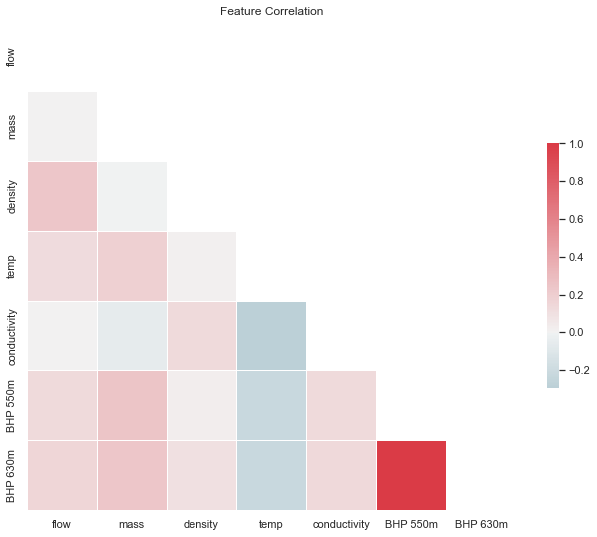

In [49]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Feature Correlation')
plt.savefig('correlation2.png')
#There is a strong correlation between both Pressure columns, for the purpose of building an efficient machine learning model, one will be dropped

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

### Data Labelling

#### The use case is a classification problem, hence the dataset will be blabelled with the mean the threshold

In [55]:
# leak < mean 
# non_leak > mean

label=[]

for i in (df['BHP 550m']) & (df['BHP 630m']) &(df['temp']) &(df['flow']) & (df['density']) \
& (df['conductivity']) & (df['mass']):
    if (i < (df['BHP 550m']).mean()) & (i < (df['BHP 630m']).mean()) \
    & (i < (df['flow']).mean()) & (i < (df['density']).mean()) \
    & (i < (df['conductivity']).mean()) & (i < (df['mass']).mean()):
                                            label.append('leak')
    else:
        label.append('non leak')
df['label'] = label

In [56]:
df['label'].unique()


array(['leak', 'non leak'], dtype=object)

In [57]:
df.head()

,Date [dd.mm.yyyy],Time [hh:mm:ss],Unnamed: 2,datetime,flow,mass,density,temp,conductivity,BHP 550m,BHP 630m,label
0,10/12/2015,16:45:00,0:05:00,12/10/2015 16:45,2,4,1,12,0,62,71,leak
1,10/12/2015,16:50:00,0:05:00,12/10/2015 16:50,132,4,0,12,0,61,63,leak
2,10/12/2015,16:55:00,0:05:00,12/10/2015 16:55,597,4,0,11,0,61,66,leak
3,10/12/2015,17:00:00,0:05:00,12/10/2015 17:00,619,4,1,12,0,61,71,leak
4,10/12/2015,17:05:00,0:05:00,12/10/2015 17:05,619,5,1,10,0,62,71,leak


### We drop columns not necessary for data pre-processing 

In [58]:
ml_df=df.drop(['Date [dd.mm.yyyy]','Time [hh:mm:ss]','Unnamed: 2','datetime','BHP 630m'], axis=1)

In [59]:
ml_df.head()

,flow,mass,density,temp,conductivity,BHP 550m,label
0,2,4,1,12,0,62,leak
1,132,4,0,12,0,61,leak
2,597,4,0,11,0,61,leak
3,619,4,1,12,0,61,leak
4,619,5,1,10,0,62,leak


### Visualising the spread of labels in each feature

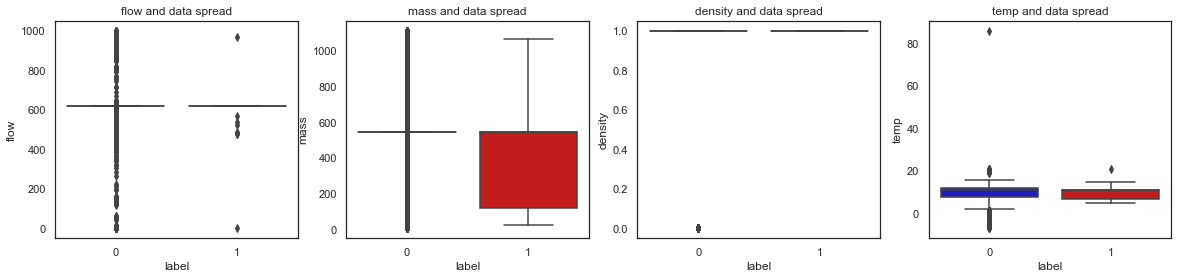

In [90]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="label", y="flow", data=ml_df, palette=colors, ax=axes[0])
axes[0].set_title('flow and data spread')

sns.boxplot(x="label", y="mass", data=ml_df, palette=colors, ax=axes[1])
axes[1].set_title('mass and data spread')


sns.boxplot(x="label", y="density", data=ml_df, palette=colors, ax=axes[2])
axes[2].set_title('density and data spread')


sns.boxplot(x="label", y="temp", data=ml_df, palette=colors, ax=axes[3])
axes[3].set_title('temp and data spread')

plt.show()


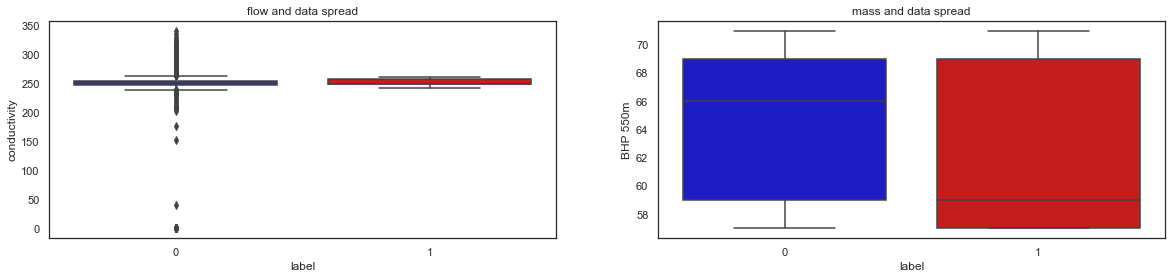

In [89]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

sns.boxplot(x="label", y="conductivity", data=ml_df, palette=colors, ax=axes[0])
axes[0].set_title('flow and data spread')

sns.boxplot(x="label", y="BHP 550m", data=ml_df, palette=colors, ax=axes[1])
axes[1].set_title('mass and data spread')


plt.show()


### --------------------------------------------------------------------------------------------------------------------------------------------------------

### Feature Engineering

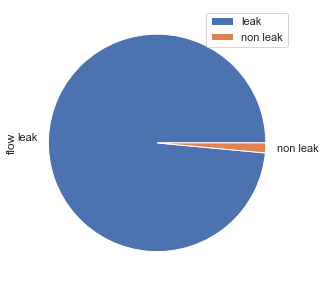

In [75]:
plot=df.groupby('label').count().plot.pie(y="flow",figsize=(5,5))
# Checking for the balance of labels within the dataframe

In [76]:
print('leak', round(ml_df['label'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('non leak', round(ml_df['label'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

leak 98.53 % of the dataset
non leak 1.47 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: leak || 1: non-leak)')

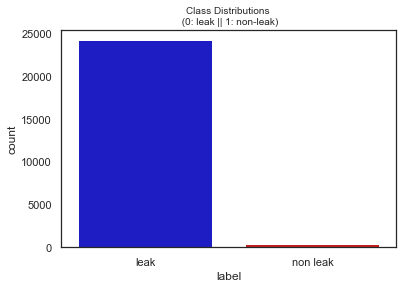

In [77]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('label', data=df, palette=colors)
plt.title('Class Distributions \n (0: leak || 1: non-leak)', fontsize=10)

In [ ]:
### Setting features and Target
#y = ml_df.iloc[:,-1]
#X = ml_df.drop('label',axis=1)
#labels=list(X.columns)
#number_features = len(labels)

### --------------------------------------------------------------------------------------------------------------------------------------------------------

### Encoding of labels (Target)

In [81]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

ml_df['label'] = lb.fit_transform(df['label'])

ml_df
# 0= leak, 1= Non leak

,flow,mass,density,temp,conductivity,BHP 550m,label
0,2,4,1,12,0,62,0
1,132,4,0,12,0,61,0
2,597,4,0,11,0,61,0
3,619,4,1,12,0,61,0
4,619,5,1,10,0,62,0
...,...,...,...,...,...,...,...
24562,156,547,1,-2,289,64,0
24563,156,547,1,-2,286,64,0
24564,156,547,1,-3,294,64,0
24565,156,547,1,-2,292,64,0


In [82]:
ml_df.groupby('label').count()

,flow,mass,density,temp,conductivity,BHP 550m
label,,,,,,
0,24205,24205,24205,24205,24205,24205
1,362,362,362,362,362,362


### ------------------------------------------------------------------------------------------------------------------------------------------------------

### Nomalization of Features

In [86]:
### Nomalization of Features
from sklearn.preprocessing import MinMaxScaler
X=ml_df.drop(['label'],axis=1)
X = MinMaxScaler().fit_transform(X)
y=ml_df.label

### ----------------------------------------------------------------------------------------------------------------------------------------------

### Data Resampling to address Label Imbalance

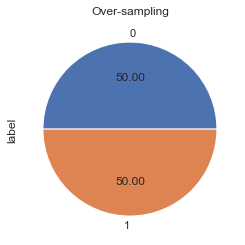

In [92]:
!pip install Tensorflow
!pip install imblearn 
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

### Splitting Dataframe into Train and Test using ratio 70:30

In [93]:
## Spliting the resampled data into Train and Test
# Split Data to test and train set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=0)

In [94]:
X_train.shape

(33887, 6)

In [95]:
X_test.shape

(14523, 6)

### --------------------------------------------------------------------------------------------------------------------------------------------------------

### Classification Models

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

### Neural Network

In [97]:
import tensorflow as tf
nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
training_start = time.perf_counter()
training_end = time.perf_counter()
nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history=nn_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)
prediction_start = time.perf_counter()
prediction_end = time.perf_counter()
nn_model_train_time = training_end-training_start
nn_model_prediction_time = prediction_end-prediction_start


Epoch 1/100
1059/1059 [==============================] - 2s 1ms/step - loss: 0.6361 - accuracy: 0.6317 - val_loss: 0.5801 - val_accuracy: 0.6791
Epoch 2/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7903 - val_loss: 0.4990 - val_accuracy: 0.8442
Epoch 3/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.4758 - accuracy: 0.8578 - val_loss: 0.4632 - val_accuracy: 0.8669
Epoch 4/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.4550 - accuracy: 0.8563 - val_loss: 0.4462 - val_accuracy: 0.8589
Epoch 5/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.4410 - accuracy: 0.8562 - val_loss: 0.4351 - val_accuracy: 0.8680
Epoch 6/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.4291 - accuracy: 0.8593 - val_loss: 0.4250 - val_accuracy: 0.8413
Epoch 7/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.4185 - accuracy: 0.8595 - val_loss: 0.4138 - val_ac

1059/1059 [==============================] - 1s 1ms/step - loss: 0.3302 - accuracy: 0.8734 - val_loss: 0.3260 - val_accuracy: 0.8801
Epoch 58/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.3288 - accuracy: 0.8758 - val_loss: 0.3224 - val_accuracy: 0.8854
Epoch 59/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.3286 - accuracy: 0.8767 - val_loss: 0.3214 - val_accuracy: 0.8771
Epoch 60/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.3276 - accuracy: 0.8767 - val_loss: 0.3226 - val_accuracy: 0.8803
Epoch 61/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.3274 - accuracy: 0.8800 - val_loss: 0.3263 - val_accuracy: 0.8712
Epoch 62/100
1059/1059 [==============================] - 1s 995us/step - loss: 0.3266 - accuracy: 0.8799 - val_loss: 0.3272 - val_accuracy: 0.8725
Epoch 63/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.3257 - accuracy: 0.8819 - val_loss: 0.3200 - val_accura

In [98]:
acc_nn_model=90.72

In [124]:
#print("Neural Network  Classifier's prediction accuracy is: %3.2f" % (nn_model))
print("Time consumed for training: %4.3f seconds" % (nn_model_train_time))
print("Time consumed for prediction: %6.5f seconds" % (nn_model_prediction_time))

Time consumed for training: 0.000 seconds
Time consumed for prediction: 0.00002 seconds


### Neural Network with RMSProp

In [125]:
import tensorflow as tf
nn_RMSProp_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
training_start = time.perf_counter()
training_end = time.perf_counter()
nn_model.compile(optimizer='RMSProp',loss='binary_crossentropy',metrics=['accuracy'])

history=nn_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)
prediction_start = time.perf_counter()
prediction_end = time.perf_counter()
nn_RMSProp_model_train_time = training_end-training_start
nn_RMSProp_model_prediction_time = prediction_end-prediction_start


Epoch 1/100
1059/1059 [==============================] - 2s 1ms/step - loss: 0.1976 - accuracy: 0.9262 - val_loss: 0.2170 - val_accuracy: 0.9386
Epoch 2/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.1935 - accuracy: 0.9276 - val_loss: 0.1952 - val_accuracy: 0.9205
Epoch 3/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.1938 - accuracy: 0.9271 - val_loss: 0.1827 - val_accuracy: 0.9367
Epoch 4/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.1930 - accuracy: 0.9273 - val_loss: 0.1866 - val_accuracy: 0.9277
Epoch 5/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.1927 - accuracy: 0.9288 - val_loss: 0.1987 - val_accuracy: 0.9140
Epoch 6/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.1945 - accuracy: 0.9264 - val_loss: 0.1904 - val_accuracy: 0.9294
Epoch 7/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.1945 - accuracy: 0.9259 - val_loss: 0.2351 - val_ac

1059/1059 [==============================] - 1s 1ms/step - loss: 0.1890 - accuracy: 0.9285 - val_loss: 0.1918 - val_accuracy: 0.9152
Epoch 58/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.1848 - accuracy: 0.9276 - val_loss: 0.1810 - val_accuracy: 0.9329
Epoch 59/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.1841 - accuracy: 0.9279 - val_loss: 0.1720 - val_accuracy: 0.9356
Epoch 60/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.1846 - accuracy: 0.9294 - val_loss: 0.1888 - val_accuracy: 0.9224
Epoch 61/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.1824 - accuracy: 0.9291 - val_loss: 0.1804 - val_accuracy: 0.9329
Epoch 62/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.1830 - accuracy: 0.9303 - val_loss: 0.1751 - val_accuracy: 0.9324
Epoch 63/100
1059/1059 [==============================] - 1s 1ms/step - loss: 0.1851 - accuracy: 0.9283 - val_loss: 0.1835 - val_accuracy

In [126]:
acc_nn_RMSProp_model=93.82

In [127]:
print("Time consumed for training: %4.3f seconds" % (nn_RMSProp_model_train_time))
print("Time consumed for prediction: %6.5f seconds" % (nn_RMSProp_model_prediction_time))

Time consumed for training: 0.000 seconds
Time consumed for prediction: 0.00003 seconds


### KNN Classifier

In [106]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 99.28
Time consumed for training: 0.054 seconds
Time consumed for prediction: 1.09246 seconds


#### Naive Bayes

In [110]:
#scaler_gnb=GaussianNB()
from sklearn.preprocessing import MaxAbsScaler
#sdss = scaler_gnb.fit_transform(ml_df.drop('label', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X_res, y_res, test_size=0.30,random_state=0)
#X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X_res, y_res, test_size=0.30, random_state=0)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 53.69
Time consumed for training: 0.009 seconds
Time consumed for prediction: 0.00170 seconds


#### XG BOOST

In [115]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 99.03
Time consumed for training: 0.531
Time consumed for prediction: 0.01051 seconds


#### Random Forest Classifier

In [111]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 99.50
Time consumed for training: 0.142 seconds
Time consumed for prediction: 0.01623 seconds


#### Support Vector Machine Classifier

In [112]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 85.09
Time consumed for training: 26.849 seconds
Time consumed for prediction: 17.46296 seconds


### KNN Classifier

In [113]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 99.28
Time consumed for training: 0.035 seconds
Time consumed for prediction: 1.05044 seconds


### Summary of Result

In [128]:
results = pd.DataFrame({
    'Model': ['Neural Network','Neural Network with RMSProp','KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    'Score': [acc_nn_model,acc_nn_RMSProp_model,acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Runtime Training': [nn_model_train_time,nn_RMSProp_model_train_time,knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [nn_model_prediction_time,knn_prediction_time,nn_RMSProp_model_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score,Runtime Training,Runtime Prediction
Model,,,
Random Forest,99.497349,0.142478,0.016230
KNN,99.277009,0.035461,0.000026
XGBoost,99.029126,0.530715,0.010514
Neural Network with RMSProp,93.820000,0.000049,1.050440
Neural Network,90.720000,0.000022,0.000025
SVC,85.092612,26.849484,17.462964
Naive Bayes,53.687255,0.008557,0.001704


<AxesSubplot:xlabel='Model'>

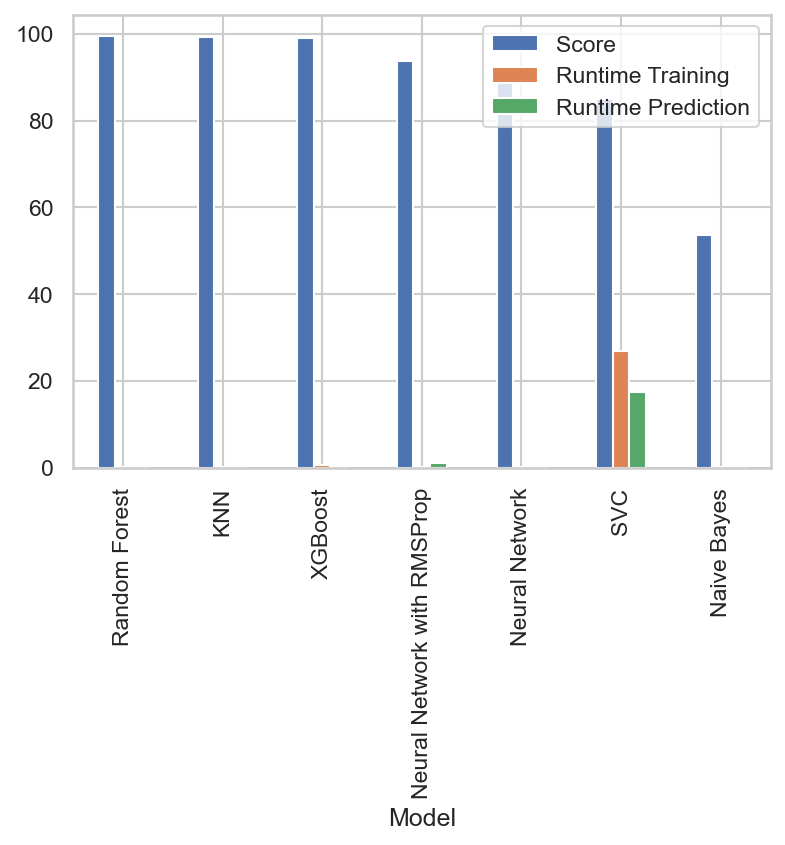

In [129]:
result_df.plot.bar()

### Hyperparameter Optimization
#### SVC showed the poorest result but it is possible to enhance the performance of this Algorithm using Grid Search for Hyperparameter optimization

In [139]:
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 0.7, 0.9, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [140]:
# SVC best estimator
svc = grid_svc.best_estimator_

In [141]:
svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

Support Vector Classifier Cross Validation Score 85.43%


### K fold Cross validation

##### We will now perform k fold cross valdiation for the top 2 classifiers, i.e. XGBoost & Random Forest.We do this to get a more realistic result by testing the performance for 10 different train and test datasets and averaging the results.Cross validation ensures that the above result is not arbitary and gives a more reliable performance check.

###  Random Forest Classifier

In [130]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99439363 0.99763942 0.9967542  0.99527884 0.9946887  0.99616406
 0.9946887  0.99645809 0.99468713 0.99557261]
Mean: 0.995632538147761
Standard Deviation: 0.0010290198570268227


### XG BOOST

In [131]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.98878725 0.9946887  0.9946887  0.99026261 0.98967247 0.99055769
 0.99262319 0.99350649 0.99173554 0.99321133]
Mean: 0.991973397856737
Standard Deviation: 0.0019870633010225292


### KNN

In [132]:
knn_cv = KNeighborsClassifier()
scores = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.98878725 0.99704928 0.99586899 0.9946887  0.99232812 0.99350841
 0.99114783 0.99439197 0.99321133 0.99321133]
Mean: 0.9934193217657097
Standard Deviation: 0.002227907352503162


### SVM

In [133]:
svc_cv = SVC()
scores = cross_val_score(svc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.84656241 0.85187371 0.85482443 0.85423429 0.85187371 0.85246385
 0.85807023 0.85360094 0.85330579 0.86009445]
Mean: 0.853690380678095
Standard Deviation: 0.003476290399304284


### Naive Baiyes

In [134]:
gnb_cv = GaussianNB()
scores = cross_val_score(gnb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.53732665 0.54499852 0.54145766 0.53821186 0.5367365  0.54352316
 0.53909708 0.5363046  0.54014168 0.54132231]
Mean: 0.5399120026141941
Standard Deviation: 0.0027691108975397053


### Feature Importance :
#### Decision Trees have the unique property of being able to order features by their ability to split between the classes.We will now visualize the features and their splitting ability.

In [135]:
importances = pd.DataFrame({
    'Feature': ml_df.drop('label', axis=1).columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
temp,0.471854
BHP 550m,0.381940
conductivity,0.058823
mass,0.052919
flow,0.034464
density,0.000000


<AxesSubplot:xlabel='Feature'>

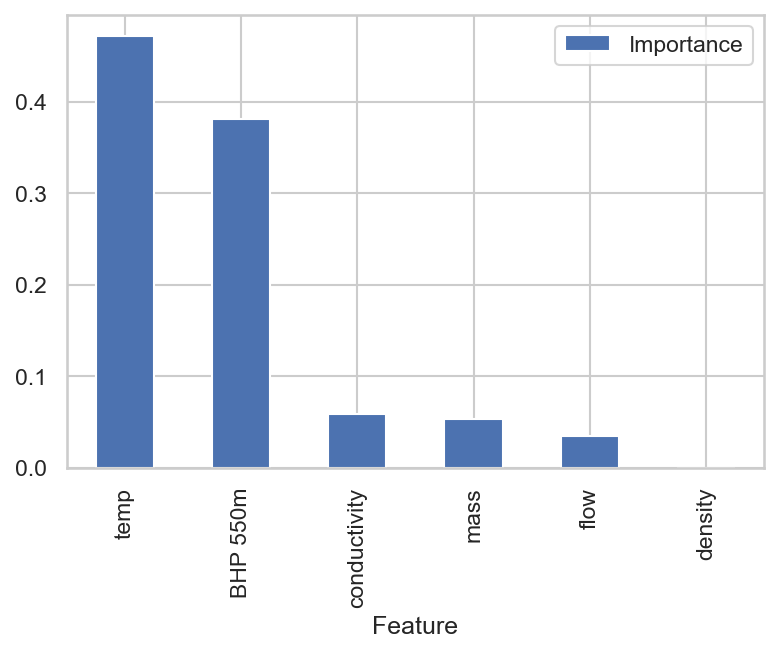

In [136]:
importances.plot.bar()

### Clustering

In [137]:

# New_df is from the random undersample data (fewer instances)

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
X = ml_df.drop('label', axis=1)
y = ml_df['label']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))


T-SNE took 9.9e+01 s
PCA took 0.092 s
Truncated SVD took 0.054 s


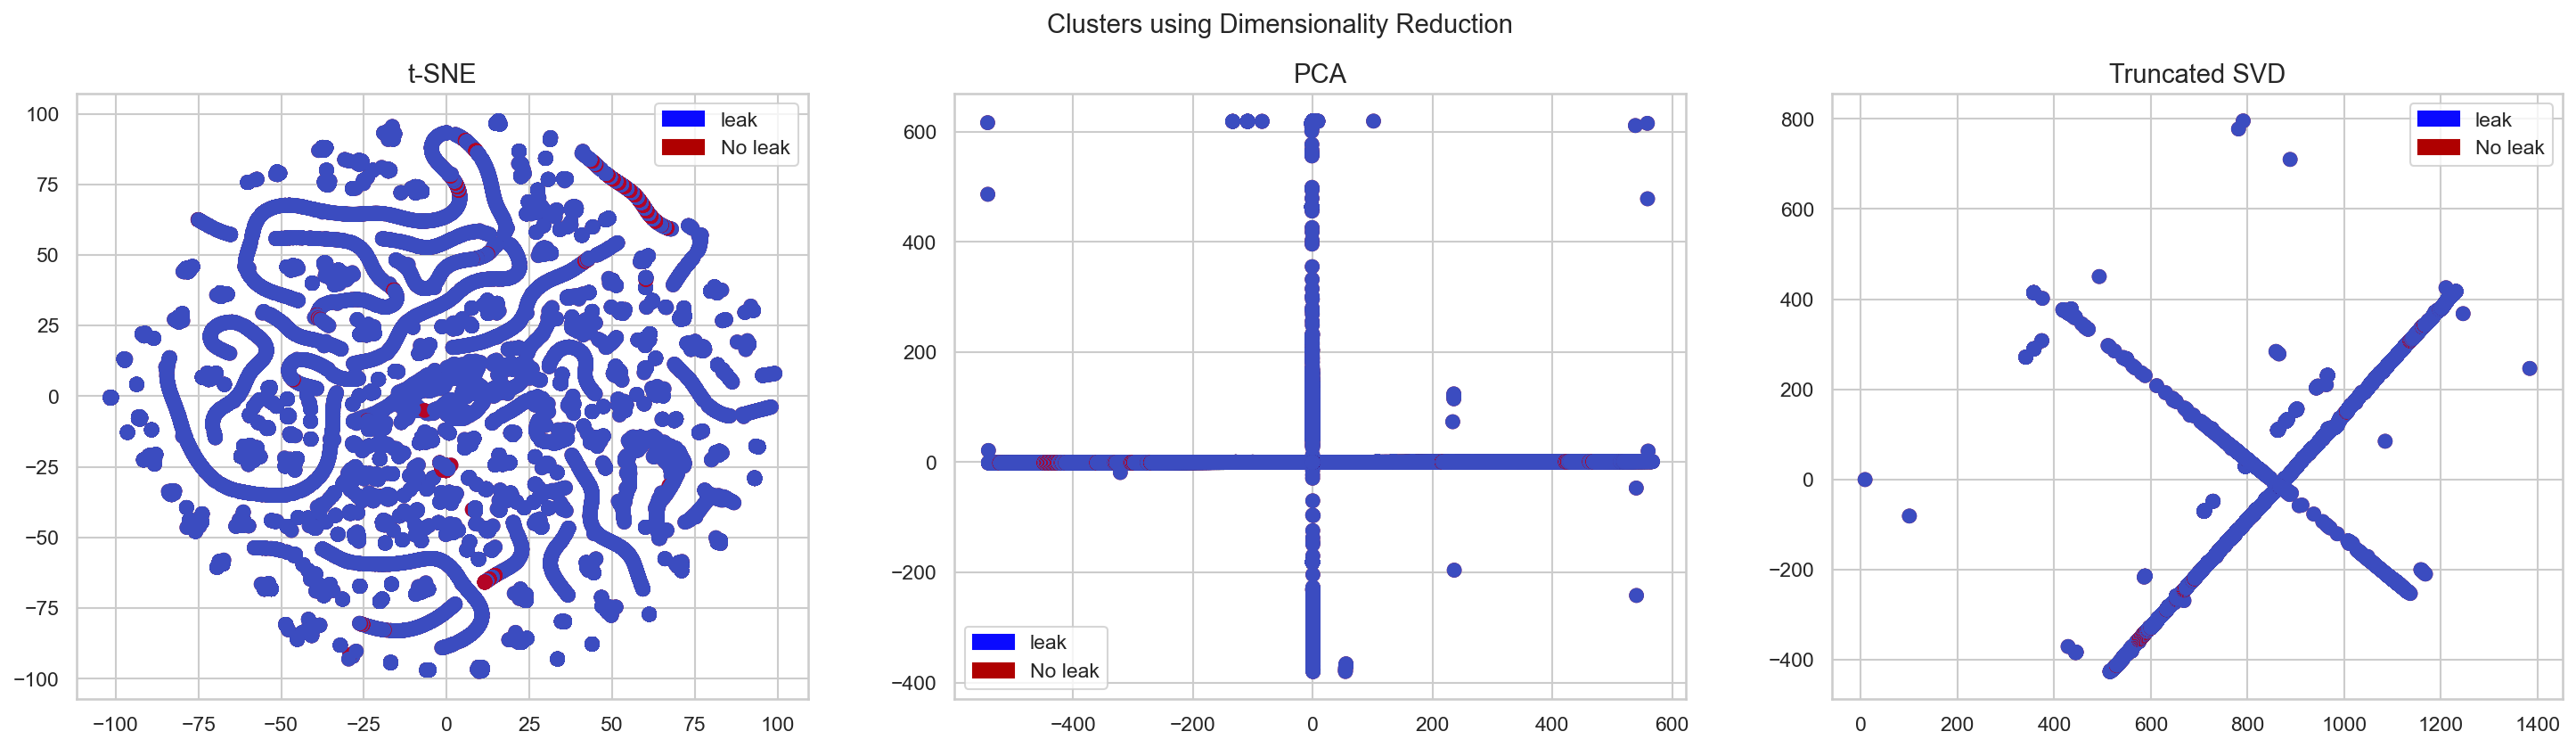

In [138]:
import matplotlib.patches as mpatches
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No leak', 'leak']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='leak')
red_patch = mpatches.Patch(color='#AF0000', label='No leak')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Leak', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='No leak', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Leak', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='No leak', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Leak', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='No leak', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()